## COVID-19 ANALYSIS of AFRICAN COUNTRIES
### by Kola Ademola

This an exploratory data analysis on the WHO COVID-19 world dataset.  
This analysis will be done using Python(pandas library specifically) and I will be focusing on how the virus has affected Africa.  
Starting of I will be importing the neccesary libraries and the dataset.

##### importing the libraries 

In [116]:
import pandas as pd

In [117]:
import matplotlib.pyplot as plt

In [118]:
%matplotlib inline

In [119]:
import seaborn as sb

##### importing the datasets

I'll be using The WHO COVID-19 world dataset.  
This dataset was gotten from their website. 

In [120]:
covid_data = pd.read_csv("WHO-COVID-19-global-data.csv", parse_dates = ['Date_reported'])

###### confirming that the dataset was imported succesfully

In [121]:
covid_data.head(5)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


##### exploring and getting familiar with the covid-19 dataset

In [122]:
covid_data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
282025,2023-04-02,ZW,Zimbabwe,AFRO,0,264549,0,5681
282026,2023-04-03,ZW,Zimbabwe,AFRO,6,264555,0,5681
282027,2023-04-04,ZW,Zimbabwe,AFRO,0,264555,0,5681
282028,2023-04-05,ZW,Zimbabwe,AFRO,0,264555,0,5681


In [123]:
covid_data.shape

(282030, 8)

The above tells us the dimension of the dataset and from this result we now know that this dataset contains 8 columns and 217329 rows.

In [124]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282030 entries, 0 to 282029
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_reported      282030 non-null  datetime64[ns]
 1   Country_code       280840 non-null  object        
 2   Country            282030 non-null  object        
 3   WHO_region         282030 non-null  object        
 4   New_cases          282030 non-null  int64         
 5   Cumulative_cases   282030 non-null  int64         
 6   New_deaths         282030 non-null  int64         
 7   Cumulative_deaths  282030 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 17.2+ MB


The above result gives us a brief info about the columns in the dataset ie  
the names of the columns,  
the data type of each column and   
it also tells us if they contain null values.

In [125]:
covid_data.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,2.820300e+05,2.820300e+05,282030.000000,2.820300e+05
mean,2.702554e+03,1.217026e+06,24.441336,1.634340e+04
std,3.928458e+04,5.719423e+06,145.239069,7.045592e+04
min,-3.731400e+05,0.000000e+00,-2437.000000,0.000000e+00
25%,0.000000e+00,1.377000e+03,0.000000,1.300000e+01
50%,1.200000e+01,2.778200e+04,0.000000,3.140000e+02
75%,3.700000e+02,3.332770e+05,4.000000,4.905000e+03
max,6.966046e+06,1.028739e+08,11447.000000,1.118800e+06


The above result gives us a statistical summary of the numerical columns in the dataset

##### I will be filtering the dataset to get only the African countries and this will be done by filtering the countries by the WHO African Regional Office(AFRO)

In [126]:
cd_africa = covid_data[covid_data['WHO_region'] == 'AFRO']
cd_africa

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
2380,2020-01-03,DZ,Algeria,AFRO,0,0,0,0
2381,2020-01-04,DZ,Algeria,AFRO,0,0,0,0
2382,2020-01-05,DZ,Algeria,AFRO,0,0,0,0
2383,2020-01-06,DZ,Algeria,AFRO,0,0,0,0
2384,2020-01-07,DZ,Algeria,AFRO,0,0,0,0
...,...,...,...,...,...,...,...,...
282025,2023-04-02,ZW,Zimbabwe,AFRO,0,264549,0,5681
282026,2023-04-03,ZW,Zimbabwe,AFRO,6,264555,0,5681
282027,2023-04-04,ZW,Zimbabwe,AFRO,0,264555,0,5681
282028,2023-04-05,ZW,Zimbabwe,AFRO,0,264555,0,5681


###### cd_africa is an abbreviation for "covid data africa"

###### Now we can begin exploring the dataset which now contains only African countries.

I will be selecting the columns relevant for this analysis

In [127]:
cd_africa = cd_africa[['Date_reported', 'Country', 'New_cases', 'New_deaths']]
cd_africa

,Date_reported,Country,New_cases,New_deaths
2380,2020-01-03,Algeria,0,0
2381,2020-01-04,Algeria,0,0
2382,2020-01-05,Algeria,0,0
2383,2020-01-06,Algeria,0,0
2384,2020-01-07,Algeria,0,0
...,...,...,...,...
282025,2023-04-02,Zimbabwe,0,0
282026,2023-04-03,Zimbabwe,6,0
282027,2023-04-04,Zimbabwe,0,0
282028,2023-04-05,Zimbabwe,0,0


In [128]:
cd_africa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59500 entries, 2380 to 282029
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date_reported  59500 non-null  datetime64[ns]
 1   Country        59500 non-null  object        
 2   New_cases      59500 non-null  int64         
 3   New_deaths     59500 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB


###### We'll be seeing how the total amount of cases compares to the amount of deaths caused by the virus in Africa

In [129]:
cd_africa[['New_deaths', 'New_cases']].sum()

New_deaths     175334
New_cases     9518476
dtype: int64

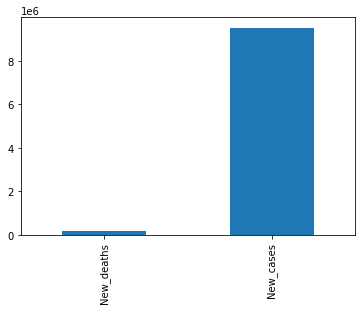

In [130]:
cd_africa[['New_deaths', 'New_cases']].sum().plot(kind = 'bar');

In [131]:
((cd_africa['New_deaths'].sum() / cd_africa['New_cases'].sum()) * 100).round(decimals = 2)

1.84

From the above results we can see that amount of deaths in Africa is a very small percentage of the amount of cases recorded in the continent.  
This is a good thing as the health officials are working tirelessly to make sure this numbers reduce.

###### We'll move on to comparing the number of recored deaths and cases in the countries and see how its affected individual countries

In [132]:
cd_cvd = cd_africa[['Country', 'New_cases', 'New_deaths']
                  ].groupby('Country').sum().sort_values(
                                                          by = ['New_cases', 'New_deaths'], ascending = False)
cd_cvd

,New_cases,New_deaths
Country,,
South Africa,4072533,102595
Ethiopia,500633,7573
Réunion,494595,921
Zambia,343415,4057
Kenya,342983,5688
Botswana,329830,2795
Mauritius,297760,1044
Algeria,271592,6881
Nigeria,266665,3155


South Africa is the country with the highestamount of cases and deaths   

###### cd_cvd is an abbreviation for "covid data cases vs deaths"

###### Calculating the percentage of recorded deaths to the cases

In [133]:
#calculate the percentage of death using the New deaths & New cases column
cd_cvd['Death_percentage'] = ((cd_cvd['New_deaths'] / cd_cvd['New_cases']) * 100).round(decimals = 2)
cd_cvd

,New_cases,New_deaths,Death_percentage
Country,,,
South Africa,4072533,102595,2.52
Ethiopia,500633,7573,1.51
Réunion,494595,921,0.19
Zambia,343415,4057,1.18
Kenya,342983,5688,1.66
Botswana,329830,2795,0.85
Mauritius,297760,1044,0.35
Algeria,271592,6881,2.53
Nigeria,266665,3155,1.18


In [134]:
cd_cvd.reset_index(inplace = True)

###### Sorting out the top 5 countries with the highest death percentage

In [135]:
cd_cvd.sort_values(by = 'Death_percentage', ascending = False).head(5)

,Country,New_cases,New_deaths,Death_percentage
45,Liberia,8090,294,3.63
42,Niger,9513,315,3.31
19,Malawi,88616,2686,3.03
40,Gambia,12598,372,2.95
7,Algeria,271592,6881,2.53


From the above result we can see now that even though South Africa recorded the highest number of cases & deaths  
its just a small percentage of the recorded cases.  

###### Calculating the total deaths recorded for each month since 2020

In [136]:
# add a Year column from the date
cd_africa['Year'] = cd_africa['Date_reported'].dt.year
# add a Month column from the date
cd_africa['Month'] = cd_africa['Date_reported'].dt.month
cd_africa

C:\Users\Kola Ademola\AppData\Local\Temp\ipykernel_17812\2760319146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_africa['Year'] = cd_africa['Date_reported'].dt.year
C:\Users\Kola Ademola\AppData\Local\Temp\ipykernel_17812\2760319146.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_africa['Month'] = cd_africa['Date_reported'].dt.month


,Date_reported,Country,New_cases,New_deaths,Year,Month
2380,2020-01-03,Algeria,0,0,2020,1
2381,2020-01-04,Algeria,0,0,2020,1
2382,2020-01-05,Algeria,0,0,2020,1
2383,2020-01-06,Algeria,0,0,2020,1
2384,2020-01-07,Algeria,0,0,2020,1
...,...,...,...,...,...,...
282025,2023-04-02,Zimbabwe,0,0,2023,4
282026,2023-04-03,Zimbabwe,6,0,2023,4
282027,2023-04-04,Zimbabwe,0,0,2023,4
282028,2023-04-05,Zimbabwe,0,0,2023,4


In [137]:
#create a subset of the data to hold deaths by month summary
deaths_by_month = cd_africa.groupby([cd_africa['Year'], cd_africa['Month']])['New_deaths'].sum().reset_index()

# create a new column combining month and year
deaths_by_month['Month-Year'] = deaths_by_month['Year'].astype(str) + '-' + deaths_by_month['Month'].astype(str)

deaths_by_month

,Year,Month,New_deaths,Month-Year
0,2020,1,0,2020-1
1,2020,2,0,2020-2
2,2020,3,237,2020-3
3,2020,4,1087,2020-4
4,2020,5,1566,2020-5
5,2020,6,5755,2020-6
6,2020,7,7337,2020-7
7,2020,8,8363,2020-8
8,2020,9,4311,2020-9
9,2020,10,2665,2020-10


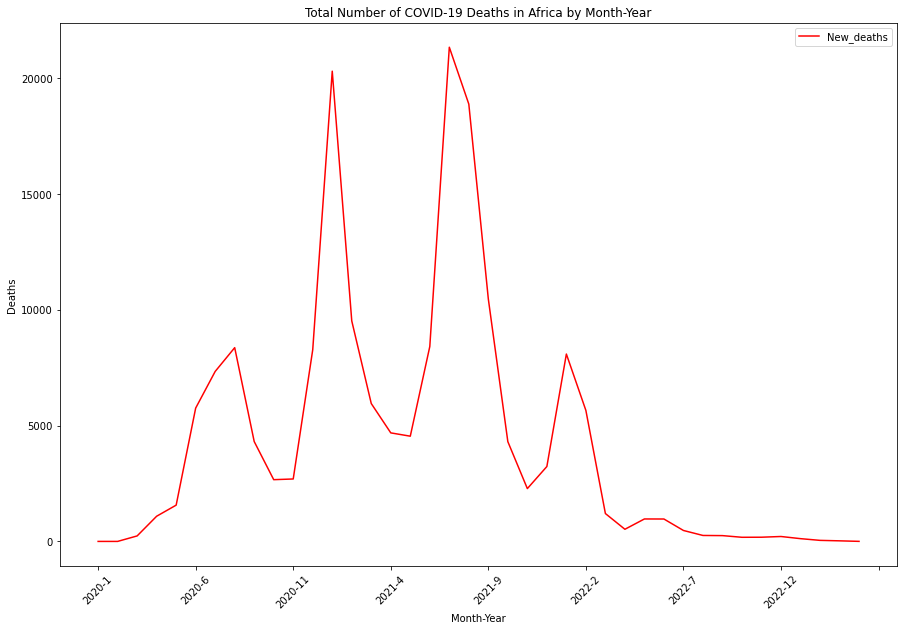

In [138]:
# plot the line chart
deaths_by_month.plot(x = 'Month-Year',y = 'New_deaths', color = 'red', figsize = (15, 10))
plt.xticks(rotation = 45)
plt.xlabel('Month-Year')
plt.ylabel('Deaths')
plt.title('Total Number of COVID-19 Deaths in Africa by Month-Year');

From the above results we can say that since July, 2021 there has been a gradual decline in the total amount of death in Africa caused by the virus.  
Note: There are some exceptional months(outliers) when a spike in the total amount of deaths since then, but still it keeps reducing.

###### This has been a fun experience exploring this dataset and with this I'll also add a world heatmap to support the visuals and give a clearer picture to support this analysis

###### Exporting the dataframe needed for the external visuals

In [139]:
cd_cvd.to_csv('cd_cvd.csv', index = True)